# Imports

In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Functions

In [8]:
def exponential(x, a, b):
    return a * np.exp(x / b)

# Data

## Total confirmed cases

In [9]:
#the following arrays report the total number of COVID-19 cases in Italy and Spain

cases_italy = [229, 323, 470, 665, 889, 1128, 1701, 
         2036, 2502, 3089, 3858, 4636, 5883, 7375,
         9172, 10149, 12462, 15113, 17660] #start on Feb 24th

cases_spain = [25, 33, 58, 84, 
         120, 165, 228, 282, 401, 525, 674, 
         1231, 1695, 2277, 3146, 5232] #start on Feb 27

## Deaths

In [10]:
#total deaths from COVID-19 in Italy and Spain

deaths_italy = [1, 2, 3,
         7, 11, 12, 17, 21, 29, 41, 
         52, 79, 107, 148, 197, 233, 366,
         463, 631, 827, 1016, 1266] #start on Feb 21

deaths_spain = [1, 2, 3, 8, 10, 17,
         30, 36, 55, 86, 133] #start on Mar 3rd

# Dummy Exponential Fit: Italy vs Spain

In [15]:
n_cases_days = len(cases_italy)
delta = len(cases_italy) - len(cases_spain)
x_cases_italy = np.arange(n_cases_days)
x_cases_spain = x_cases_italy[delta:]

n_deaths_days = len(deaths_italy)
delta = len(deaths_italy) - len(deaths_spain)
x_deaths_italy = np.arange(n_deaths_days)
x_deaths_spain = x_deaths_italy[delta:]

## Fit

In [16]:
#fit with a simple exponential, y_error proportional to n^0.5
popt_cases_italy, pcov_cases_italy = curve_fit(exponential, x_cases_italy, cases_italy, sigma=np.sqrt(cases_italy))
popt_cases_spain, pcov_cases_spain = curve_fit(exponential, x_cases_spain, cases_spain, sigma=np.sqrt(cases_spain))
popt_deaths_italy, pcov_deaths_italy = curve_fit(exponential, x_deaths_italy, deaths_italy, sigma=np.sqrt(deaths_italy))
popt_deaths_spain, pcov_deaths_spain = curve_fit(exponential, x_deaths_spain, deaths_spain, sigma=np.sqrt(deaths_spain))

In [17]:
params = {'axes.labelsize': 'large'}
plt.rcParams.update(params)

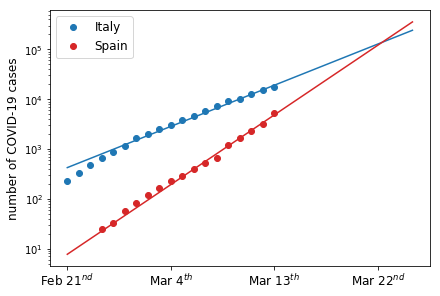

In [26]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(x_cases_italy, cases_italy, 'o', label='Italy')
ax.plot(x_cases_spain, cases_spain, 'o', color='tab:red', label='Spain')

xx = np.linspace(0, 30, 2000)
ax.plot(xx, exponential(xx, *popt_cases_italy), color='tab:blue')
ax.plot(xx, exponential(xx, *popt_cases_spain), color='tab:red')

#plot decoration
ax.set_yscale('log')
ax.set_ylabel('number of COVID-19 cases')
#ax.set_xlabel('days')
xticks = [0, 9, 18, 27]
xtickslabels = ['Feb 21$^{nd}$', 'Mar 4$^{th}$', 'Mar 13$^{th}$', 'Mar 22$^{nd}$']
ax.set_xticks(xticks)
ax.set_xticklabels(xtickslabels, fontsize='large')
ax.legend(fontsize='large')

fig.savefig('plot/COVIDcases_ItalyVsSpain.png', dpi = 300)

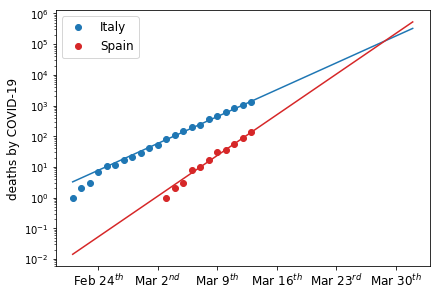

In [28]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(x_deaths_italy, deaths_italy, 'o', label='Italy')
ax.plot(x_deaths_spain, deaths_spain, 'o', color='tab:red', label='Spain')

xx = np.linspace(0, 40, 2000)
ax.plot(xx, exponential(xx, *popt_deaths_italy), color='tab:blue')
ax.plot(xx, exponential(xx, *popt_deaths_spain), color='tab:red')

#plot decoration
ax.set_yscale('log')
ax.set_ylabel('deaths by COVID-19')
#ax.set_xlabel('days')
xticks = [3, 10, 17, 24, 31, 38]
xtickslabels = ['Feb 24$^{th}$', 'Mar 2$^{nd}$', 'Mar 9$^{th}$', 'Mar 16$^{th}$', 'Mar 23$^{rd}$', 'Mar 30$^{th}$']
ax.set_xticks(xticks)
ax.set_xticklabels(xtickslabels, fontsize='large')
ax.legend(fontsize='large')

fig.savefig('plot/COVIDdeaths_ItalyVsSpain.png', dpi = 300)